<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Latihan_Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Prak ML/dataset_tweet_sentiment_opini_film.csv')
df

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sentiment   200 non-null    object
 2   Text Tweet  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
X = df['Text Tweet']
y = df['Sentiment']

# Tokenisasi
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")  # Membatasi jumlah kata yang akan digunakan
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

# Padding sequences
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post')

# Encoding Sentiment
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.2, random_state=42)

In [ ]:
# Membuat Model
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=10),
    Bidirectional(LSTM(32, return_sequences=True)),
    LSTM(16),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Kompile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Melatih Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.6117 - loss: 0.6923 - val_accuracy: 0.6250 - val_loss: 0.6893
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6503 - loss: 0.6877 - val_accuracy: 0.6250 - val_loss: 0.6829
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7082 - loss: 0.6786 - val_accuracy: 0.6250 - val_loss: 0.6741
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7384 - loss: 0.6704 - val_accuracy: 0.6750 - val_loss: 0.6616
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8459 - loss: 0.6349 - val_accuracy: 0.6750 - val_loss: 0.6413
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7819 - loss: 0.6175 - val_accuracy: 0.7250 - val_loss: 0.6115
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8814 - loss: 0.5336 - val_accuracy: 0.7500 - val_loss: 0.5586
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9086 - loss: 0.4461 - val_accuracy: 0.8250 - val_loss: 0.4670

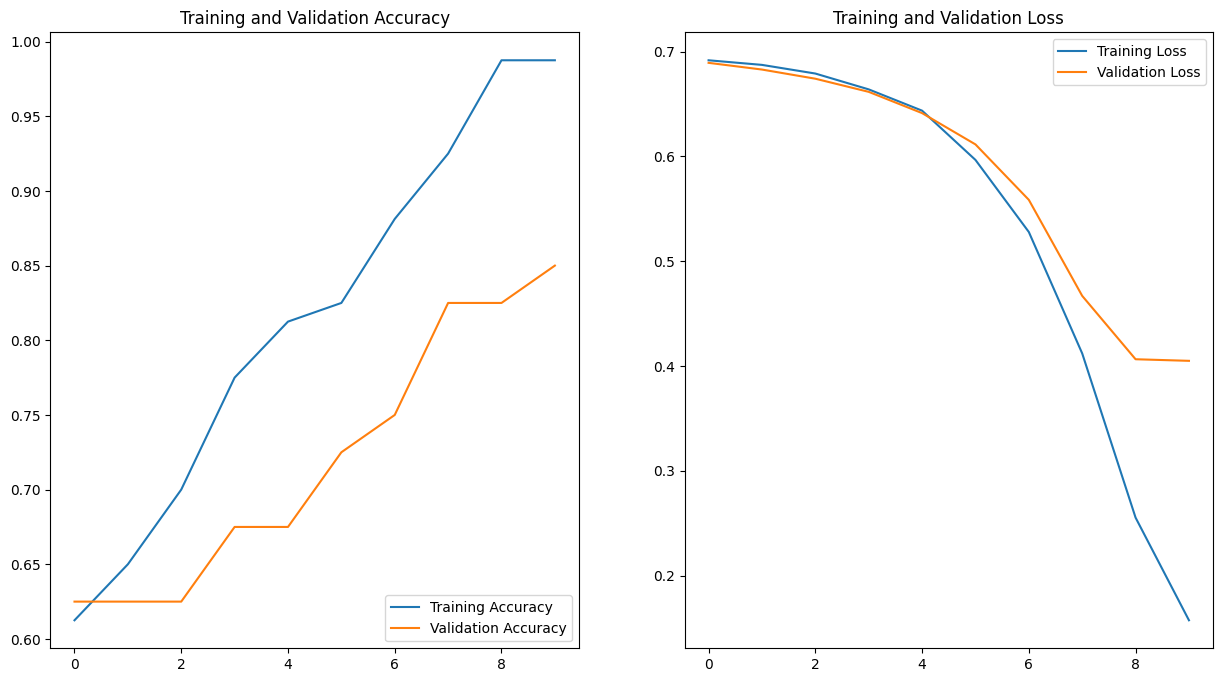

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(10), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), history.history['loss'], label='Training Loss')
plt.plot(range(10), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8375 - loss: 0.4213
Accuracy: 85.00%


In [ ]:
# Membuat prediksi pada data uji
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 


In [ ]:
# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.81      0.85        21
    positive       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



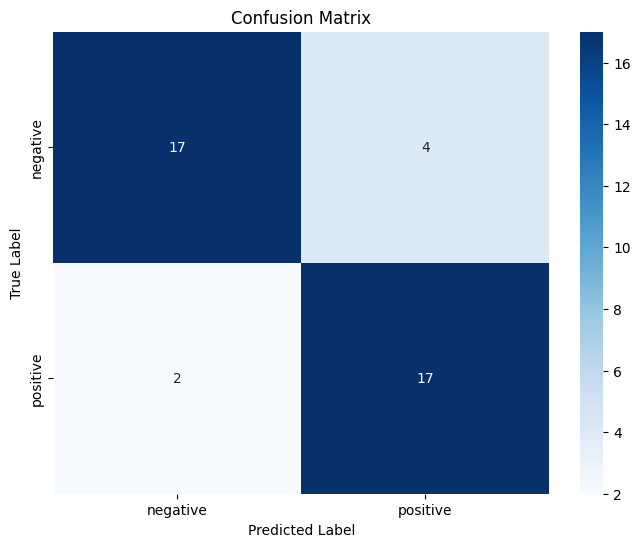

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Prediksi pada data baru
new_texts = ["menyesal nontonnya, jelek banget", "alurnya bagus, tapi aktornya kurang cocok", "ceritanya oke, aktingnya juga bagus, mantap"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=20, padding='post')

predictions = model.predict(new_padded)
predicted_labels = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for tweet, sentiment in zip(new_texts, predicted_labels):
    print(f"Tweet: '{tweet}' -> Prediksi Sentimen: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Tweet: 'menyesal nontonnya, jelek banget' -> Prediksi Sentimen: negative
Tweet: 'alurnya bagus, tapi aktornya kurang cocok' -> Prediksi Sentimen: positive
Tweet: 'ceritanya oke, aktingnya juga bagus, mantap' -> Prediksi Sentimen: positive
